In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# read data
path = r"/content/first inten project.csv"
data = pd.read_csv(path)

In [ ]:
def month_arr(date):
  parts = date.split('/')
  if len(parts) == 1:
      parts = date.split('-')
      mon = parts[1]
      day = parts[2]
      year = parts[0]
  else:
      mon = parts[0]
      day = parts[1]
      year = parts[2]
  return mon,day,year

In [ ]:
def more_than_year(data):
   year = 0
   while data >12 :
      data = data-12
      year += 1
   return data,year


In [ ]:
data[['month', 'day','year']] = pd.DataFrame(data['date of reservation'].apply(month_arr).tolist(), index=data.index)
data['month'] = data['month'].astype(int)
data['year'] = data['year'].astype(int)

data['day'] = data['day'].astype(int)
data['month of arrive'] = (data['month'] + (data['day'] + data['lead time'])//30)

data[['month of arrive','year plus']] = pd.DataFrame(data['month of arrive'].apply(more_than_year).tolist(), index=data.index)
data['year plus'] = data['year plus'].astype(int)
data['year'] = data['year'] + data['year plus']
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-not-C  average price   \
0        224             Offline  ...        0           88.00   
1          5              Online  ...        0          106.68   
2          1              Online  ...        0           50.00   
3        211              Online  ...        0          100.00   
4         48              Online  ...        0           77.00   

   special requests  date of reservation  booking status month day  year  \
0                 0            10/2/2015    Not_Canceled    10   2  2016   
1                 1            11/6/2018    Not_Canceled    11   6  2018   
2                 0            2/28/2018        Canceled     2  28  2018   
3                 1            5/20/2017        Canceled     5  20  2017   
4                 0            4/11/2018        Canceled     4  11  2018   

   month of arrive  year plus  
0                5          1  
1               11          0  
2                2          0  
3               12          0  
4                5          0  

[5 rows x 22 columns]

In [ ]:
data.drop(["Booking_ID",'date of reservation','day','month'],axis=1,inplace=True)

In [ ]:
def order(type1):
  num = type1[len(type1)-1]
  type1 = num if num != 'd' else 0
  return type1

In [ ]:
data['type of meal'] = data['type of meal'].apply(order)
data['type of meal'] = data['type of meal'].astype(int)

In [ ]:
# as for all of the notebook 1 will be for not cancleing and 0 for reverse for easier handling

data['booking status'] = data['booking status'] != 'Canceled'
data['booking status'] = data['booking status'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int64  
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

In [ ]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'year', 'month of arrive', 'year plus'],
      dtype='object')

In [66]:

month_of_arrive_count = data.groupby('month of arrive')['booking status'].value_counts().reset_index()

lead_count = data.groupby('lead time')['booking status'].value_counts().reset_index()

special_requests_chance = data.groupby('special requests')['booking status'].mean().reset_index()

year_chance = data.groupby('year')['booking status'].mean().reset_index()

# Make sure avg_booking_status is sorted by year
year_chance = year_chance.sort_values(by='year')

# Precompute counts per year (sorted)
counts_by_year = data['year'].value_counts().sort_index()
data["total booking"] = data['P-C']+data['P-not-C']


data_2019 = data[data['year'] == 2019]
monthly_counts = data_2019.groupby(['month of arrive', 'booking status']).size().reset_index(name='count')

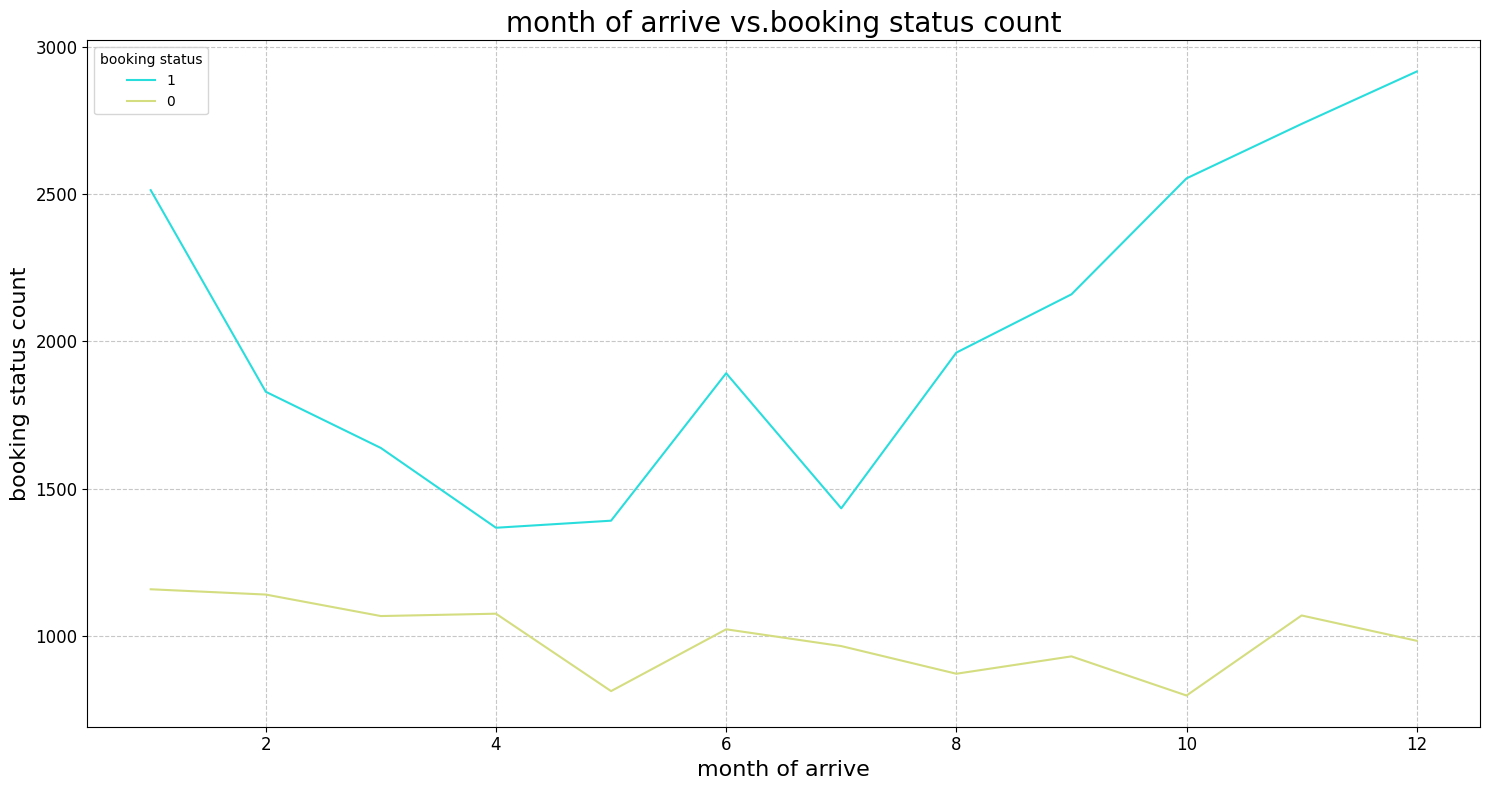

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=month_of_arrive_count, x='month of arrive', y='count',hue='booking status',palette='rainbow',hue_order=[1,0])

plt.title('month of arrive vs.booking status count', fontsize=20)
plt.ylabel('booking status count', fontsize=16)
plt.xlabel('month of arrive', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

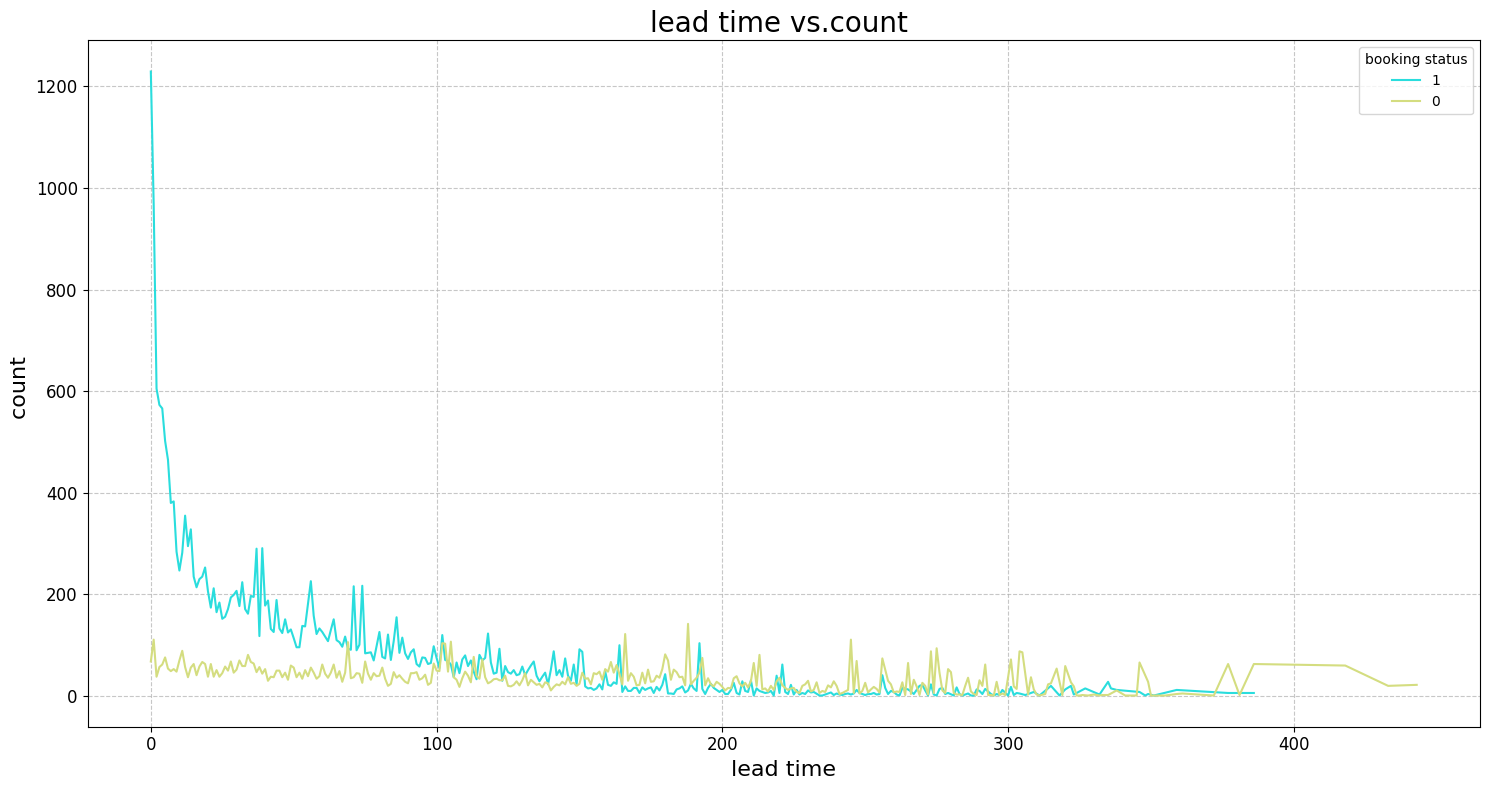

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

sns.lineplot(data=lead_count,x='lead time', y='count', hue='booking status',palette='rainbow',hue_order=[1,0])
plt.title('lead time vs.count ', fontsize=20)
plt.ylabel('count ', fontsize=16)
plt.xlabel('lead time', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-48-4027274597.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data,x='total booking', y='booking status',palette='rainbow')


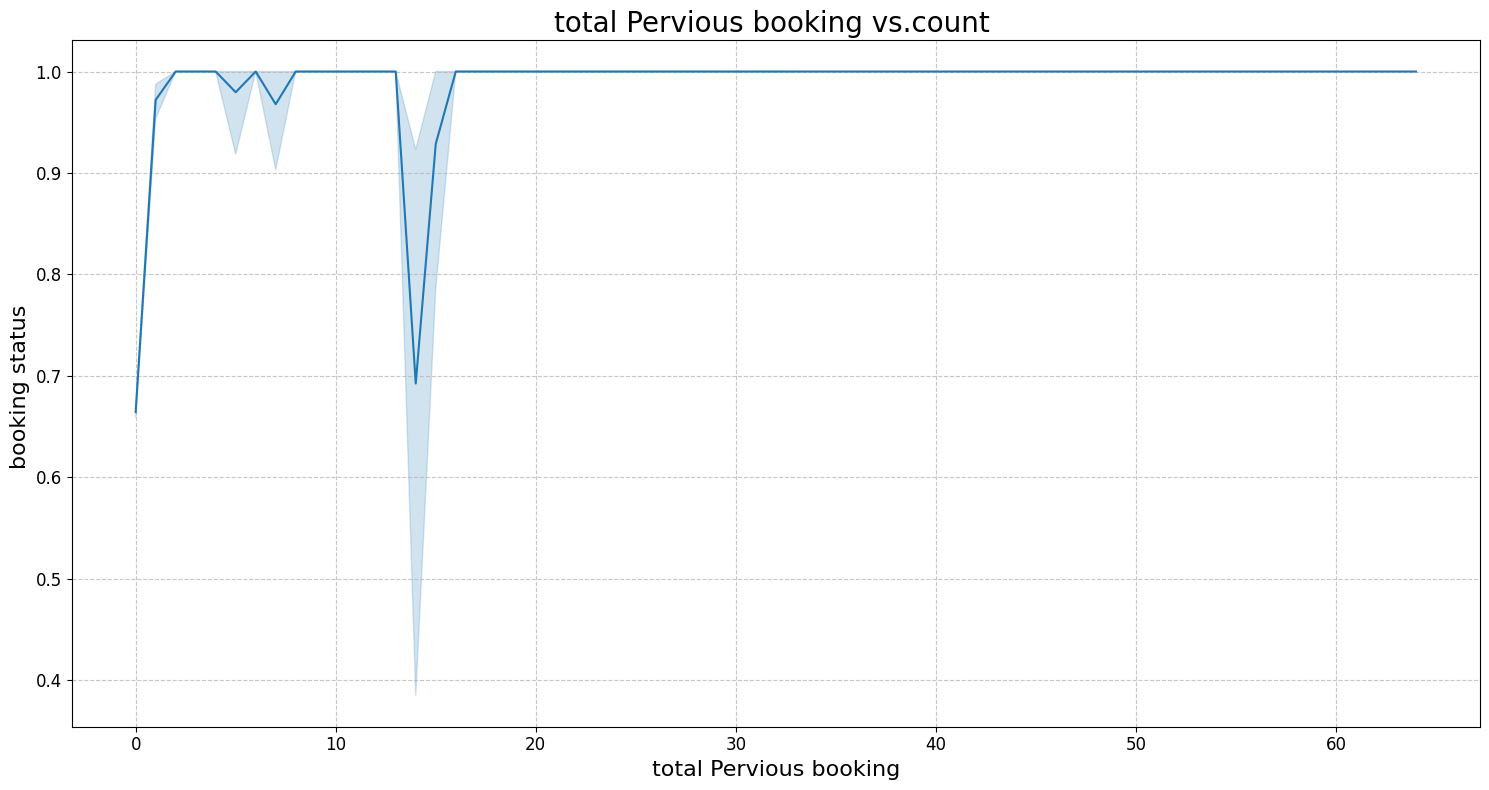

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

sns.lineplot(data=data,x='total booking', y='booking status',palette='rainbow')
plt.title('total Pervious booking vs.count ', fontsize=20)
plt.ylabel('booking status ', fontsize=16)
plt.xlabel('total Pervious booking', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-763298444.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data,x='total booking', y='lead time',palette='rainbow')


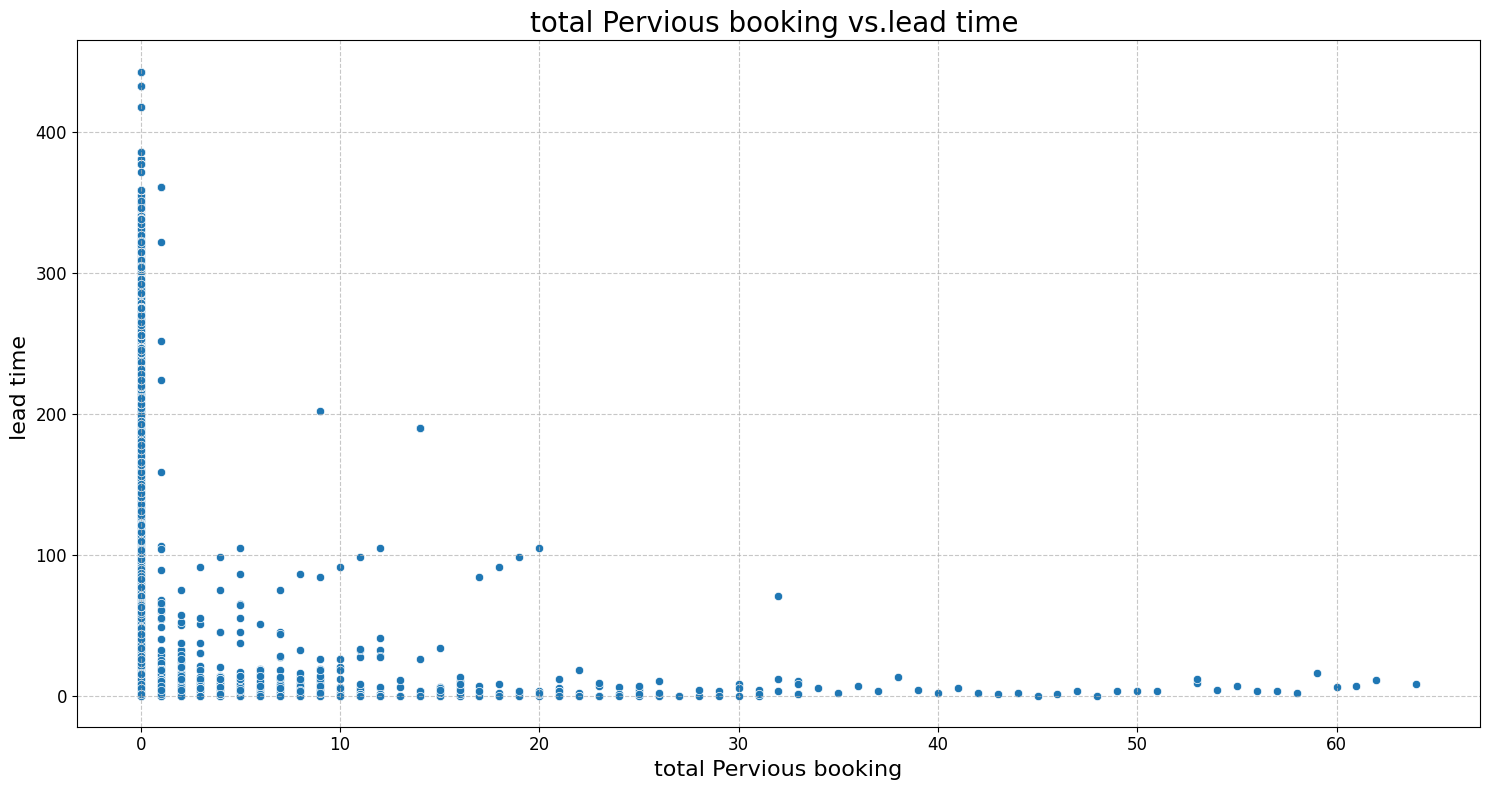

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.scatterplot(data=data,x='total booking', y='lead time',palette='rainbow')
plt.title('total Pervious booking vs.lead time ', fontsize=20)
plt.ylabel('lead time ', fontsize=16)
plt.xlabel('total Pervious booking', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

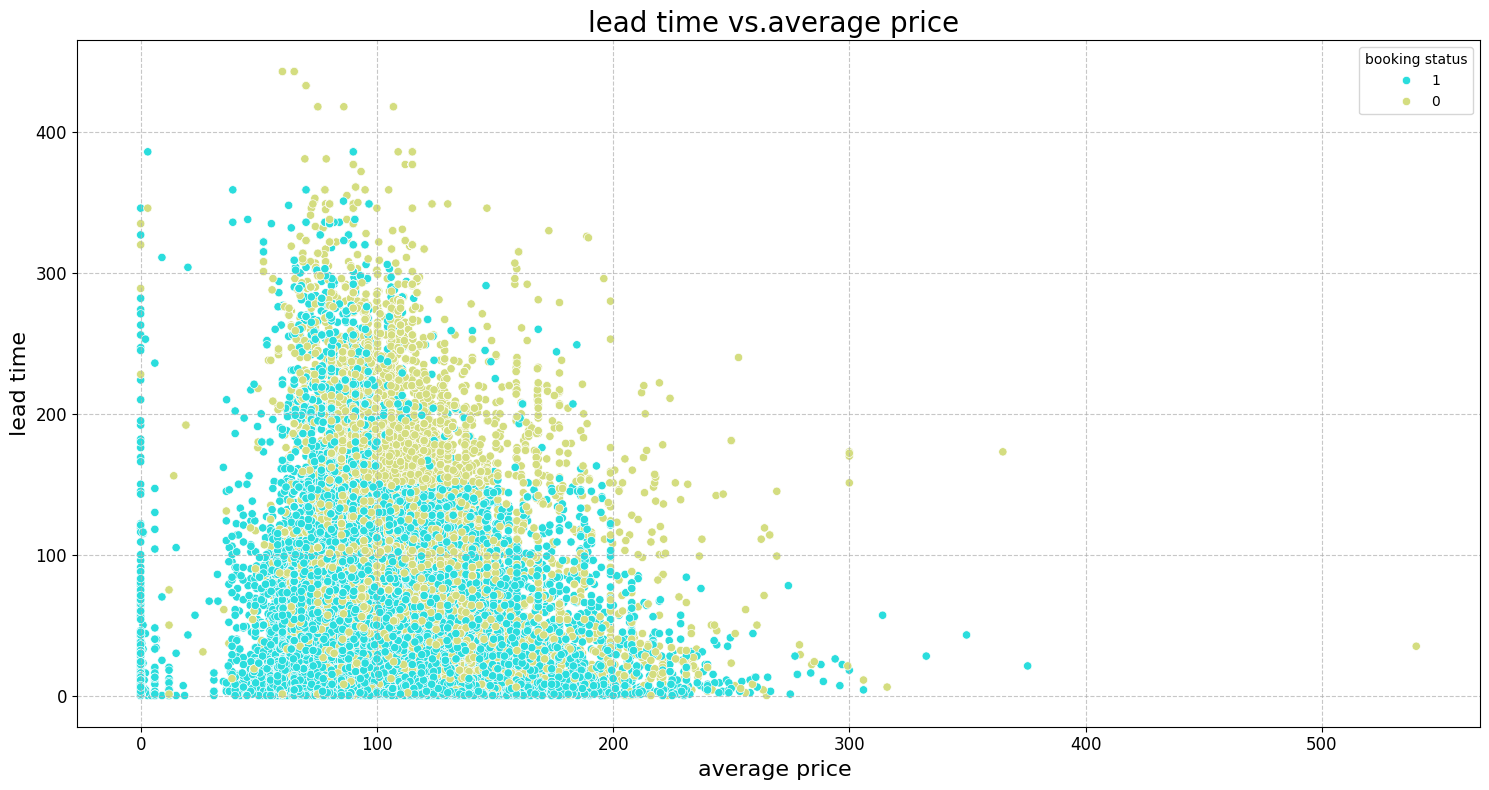

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.scatterplot(data=data,x='average price ', y='lead time',hue='booking status',palette='rainbow',hue_order=[1,0])
plt.title('lead time vs.average price ', fontsize=20)
plt.xlabel('average price ', fontsize=16)
plt.ylabel('lead time', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

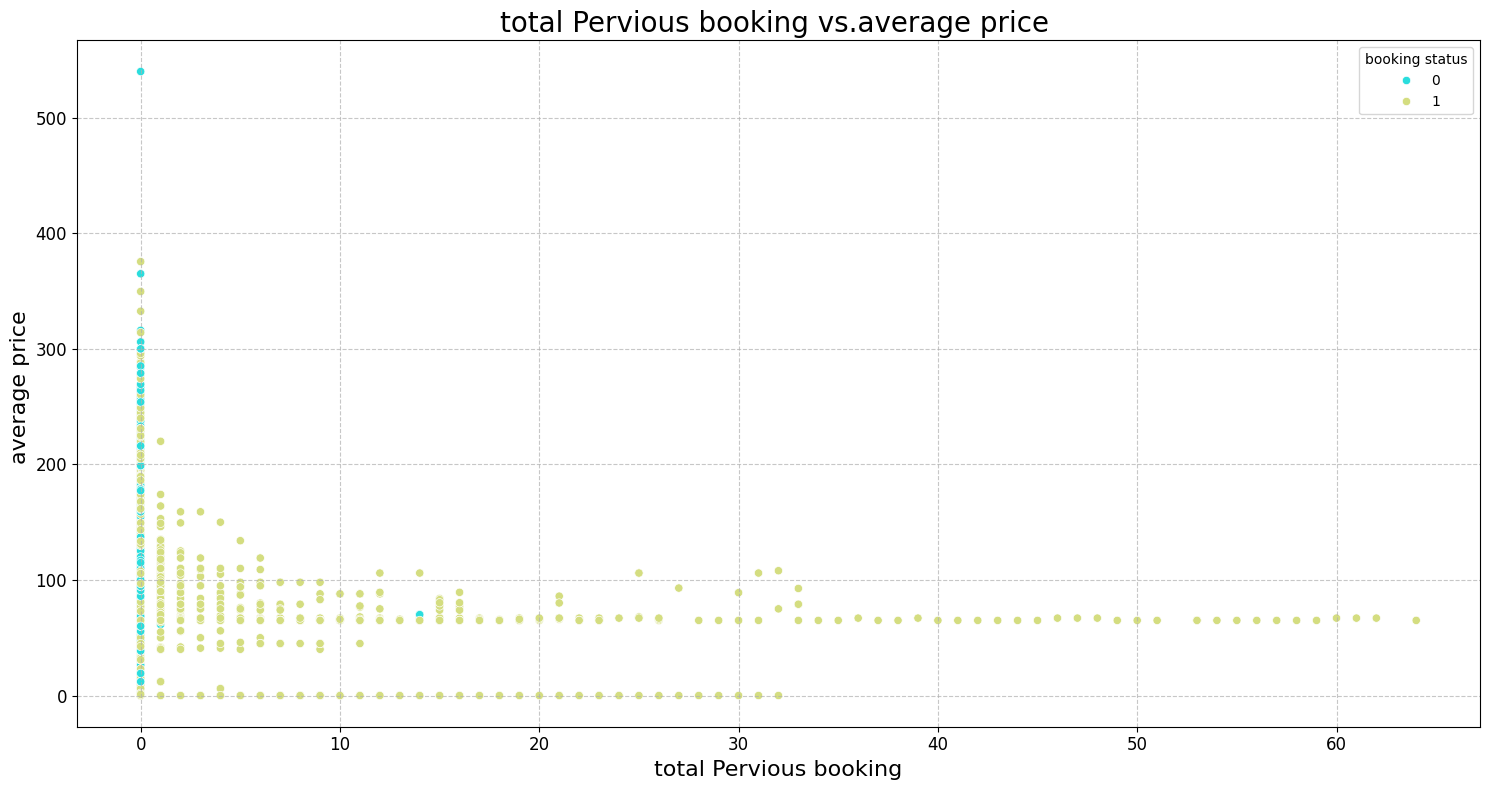

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.scatterplot(data=data,x='total booking', y='average price ',hue='booking status',palette='rainbow',hue_order=[0,1])
plt.title('total Pervious booking vs.average price ', fontsize=20)
plt.ylabel('average price ', fontsize=16)
plt.xlabel('total Pervious booking', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-63-2184312857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=special_requests_chance, x='special requests', y='booking status', palette='rainbow')


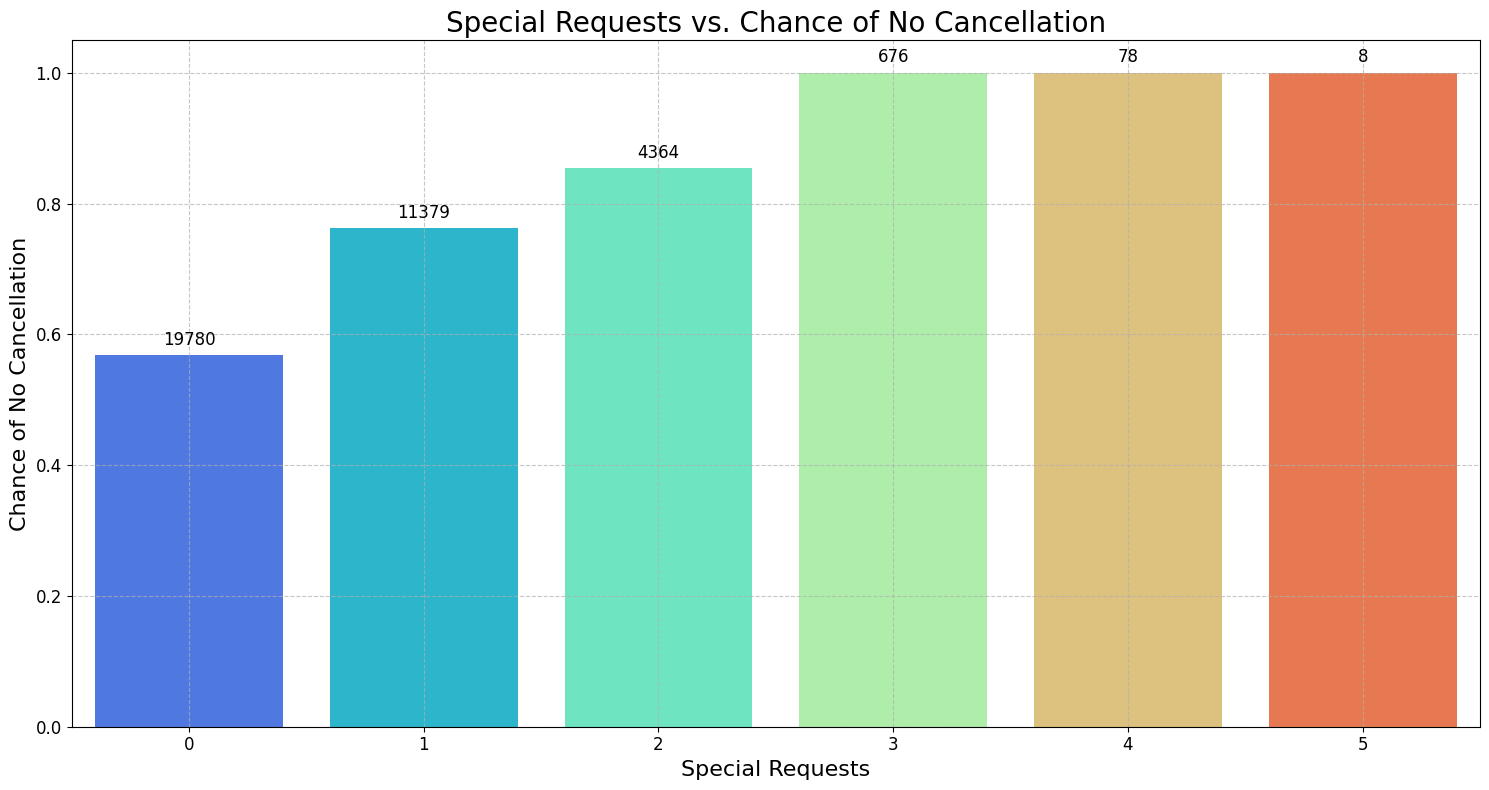

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

ax = sns.barplot(data=special_requests_chance, x='special requests', y='booking status', palette='rainbow')


i = 0
for p in ax.patches:
    value = data['special requests'].value_counts()[i]
    i += 1
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height() + 0.01,
            f'{value}',
            ha='center', va='bottom', fontsize=12)


plt.title('Special Requests vs. Chance of No Cancellation', fontsize=20)
plt.ylabel('Chance of No Cancellation', fontsize=16)
plt.xlabel('Special Requests', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-56-3505263300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_chance, x='year', y='booking status', palette='rainbow', ax=ax)


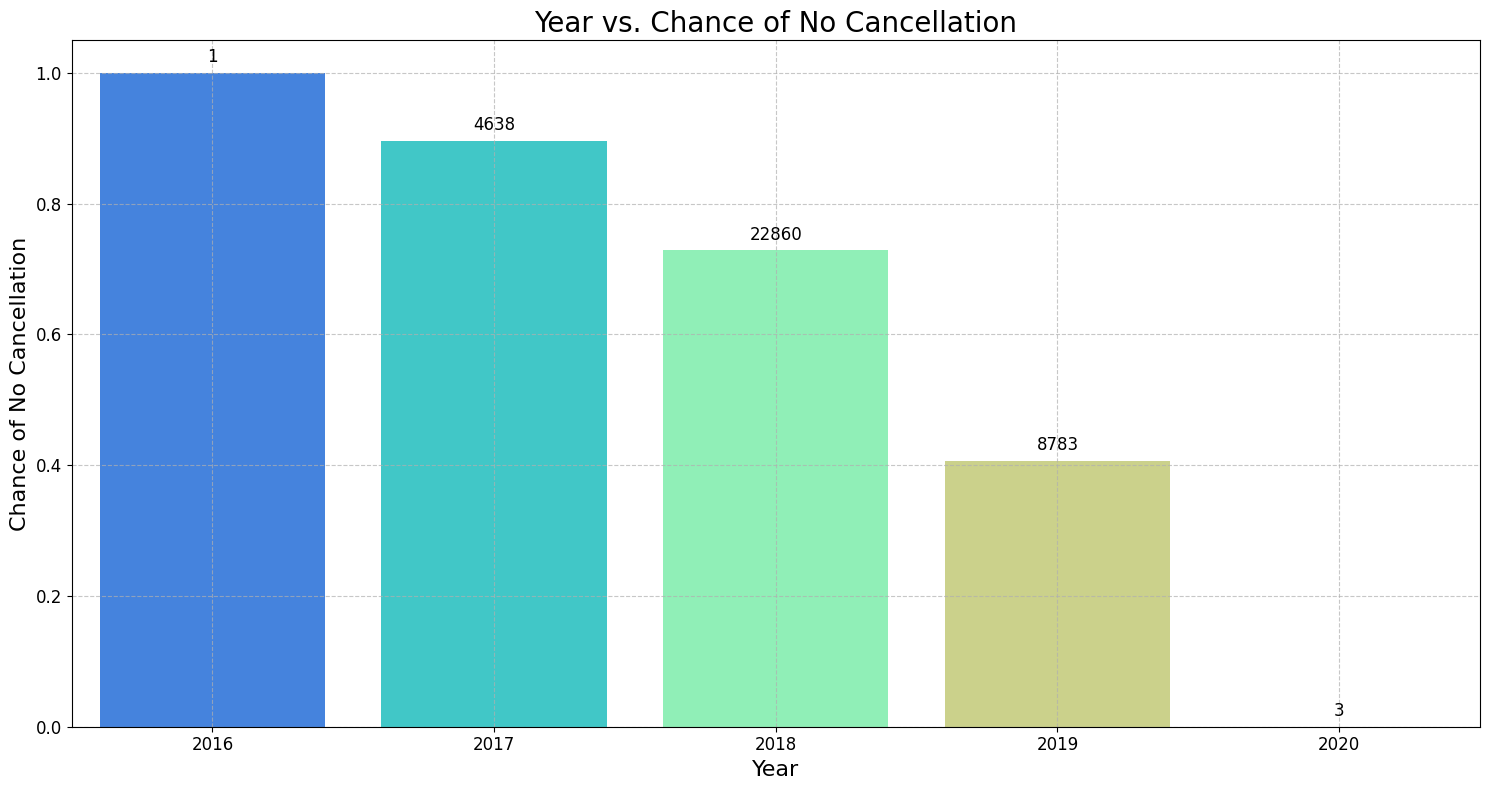

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(data=year_chance, x='year', y='booking status', palette='rainbow', ax=ax)

for i, p in enumerate(ax.patches):
    count = counts_by_year.iloc[i]
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height() + 0.01,
            f'{count}',
            ha='center', va='bottom', fontsize=12)

plt.title('Year vs. Chance of No Cancellation', fontsize=20)
plt.ylabel('Chance of No Cancellation', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


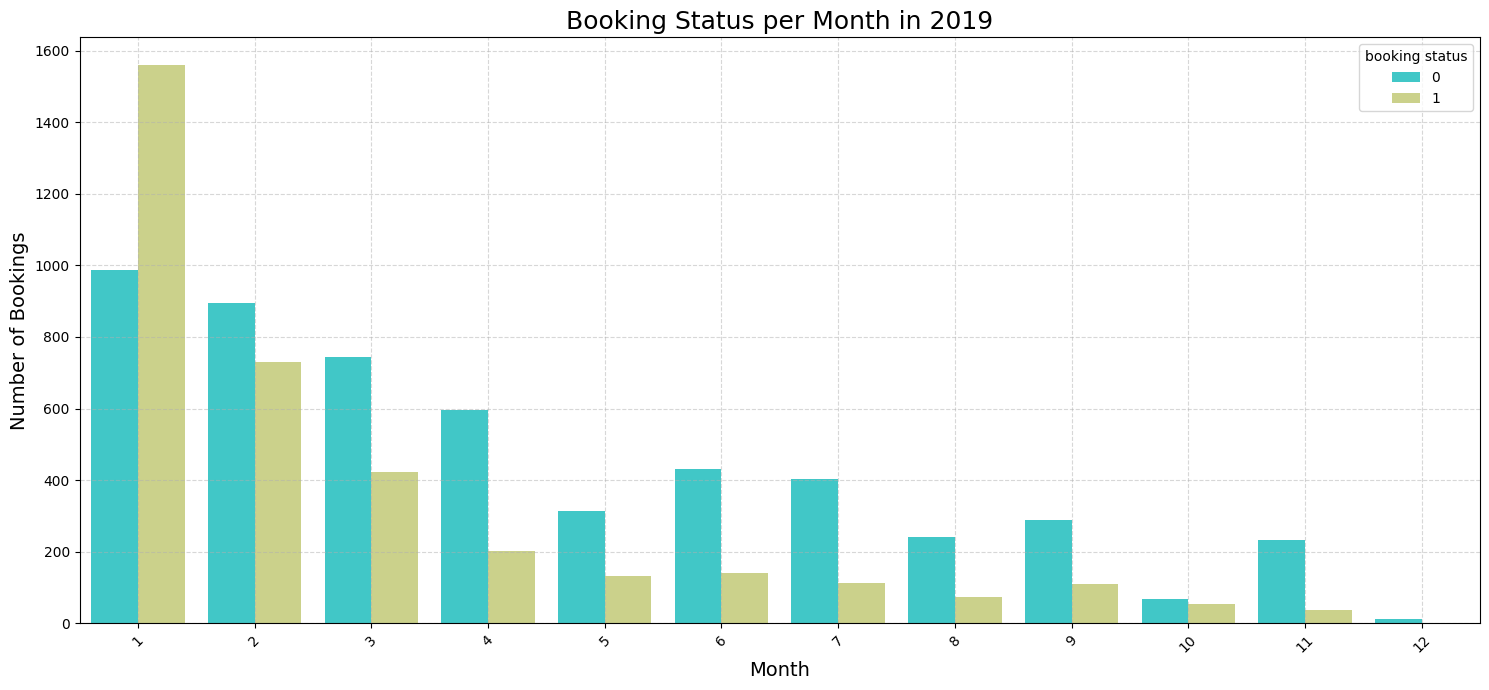

In [70]:
plt.figure(figsize=(15, 7))
sns.barplot(data=monthly_counts, x='month of arrive', y='count', hue='booking status', palette='rainbow')

plt.title('Booking Status per Month in 2019', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()